<a href="https://colab.research.google.com/github/risker93/Hello_World/blob/main/2021_06_09_%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

age: 환자의 나이

anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)

creatinine_phosphokinase: 크레아틴키나제 검사 결과

diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)

ejection_fraction: 박출계수 (%)

high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)

platelets: 혈소판 수 (kiloplatelets/mL)

serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)

serum_sodium: 혈중 나트륨 레벨 (mEq/L)

sex: 성별 (0: 여성, 1: 남성)

smoking: 흡연 여부 (0: 비흡연, 1: 흡연)

time: 관찰 기간 (일)

DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)


이러한 것들을 직접 찾아내야 한다.

우리는 의사가 아니기에 데이터 분석에 한계가 존재한다는것을 인지.



In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


의료용 데이터는 기본적으로 0이 정상 1이 발생한것. 

나이가 실수형이네? 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


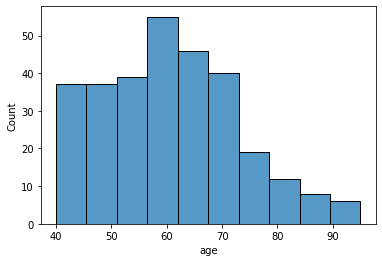

In [8]:
sns.histplot(x='age', data=df)

수치형 데이터는 분포를 확인하기 위해서 모두 시각화를 해본다.

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

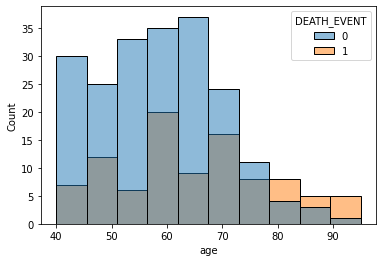

In [10]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT')

위의 데이터들 중에서 같은 나이대의 죽은사람과 산사람을 같이 보여줌.

겹쳐져서 나타난것. 

이걸로 무엇을 알수 있는가?

나이가 적을수록 생존이 많구나, 많을수록 사망하신분이 많구나. 

이런 것들이 왜 필요할까? 



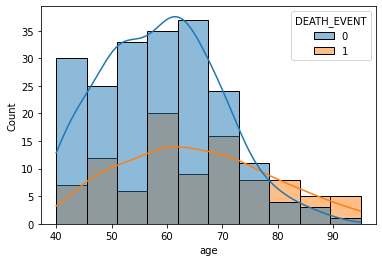

In [11]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

이렇게 kde 만으로도 확인이 가능하다.

In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

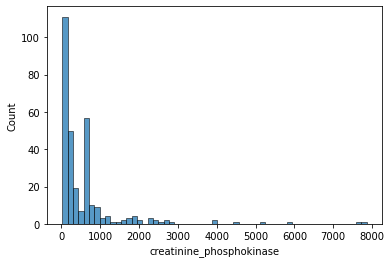

In [13]:
#sns.histplot(data=df['creatinine_phosphokinase']) 
#두 코드가 동일하지만 아래 코드가 사용하기에 유용하다.
sns.histplot(x='creatinine_phosphokinase', data=df)

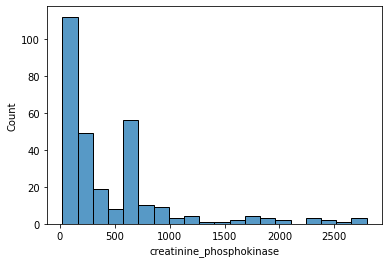

In [14]:
sns.histplot(df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

In [15]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
df['creatinine_phosphokinase'] < 3000

0       True
1      False
2       True
3       True
4       True
       ...  
294     True
295     True
296     True
297     True
298     True
Name: creatinine_phosphokinase, Length: 299, dtype: bool

3000 미만의 값은 True가 나오고 아닌값은 False가 나온다.

In [17]:
df['creatinine_phosphokinase']

0       582
1      7861
2       146
3       111
4       160
       ... 
294      61
295    1820
296    2060
297    2413
298     196
Name: creatinine_phosphokinase, Length: 299, dtype: int64

In [18]:
df.loc[df['creatinine_phosphokinase'] < 3000, :]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


이렇게 df를 불러오면 True값들만 보인다.

In [19]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

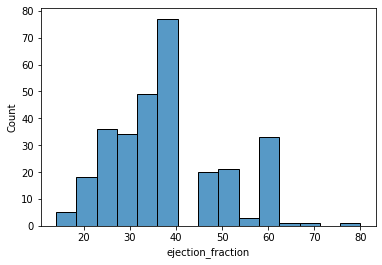

In [20]:
sns.histplot(x='ejection_fraction', data=df)

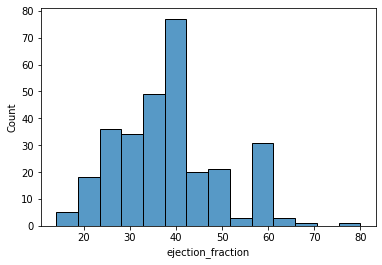

In [21]:
sns.histplot(x='ejection_fraction', data=df, bins=14)
#이렇게 bins로 구분할 수 있다.

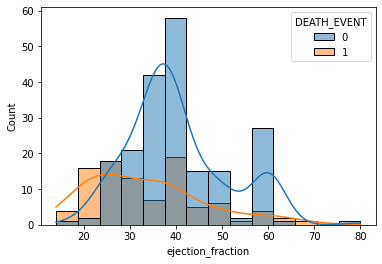

In [22]:
sns.histplot(x='ejection_fraction', data=df, bins=14, hue='DEATH_EVENT', kde=True)

의료데이터에서 recall 을 중요하게 사용한다.

confusion matrix

병에 걸렸는데 병에 걸리지 않았다고 진단하면 아주 큰일이 일어난다.

병에 실제로 걸린사람들 중에 병에 걸렸다고 예측한 것을 recall 이라함.



In [23]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

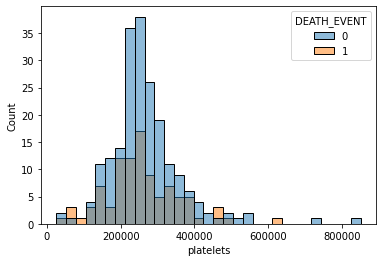

In [24]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

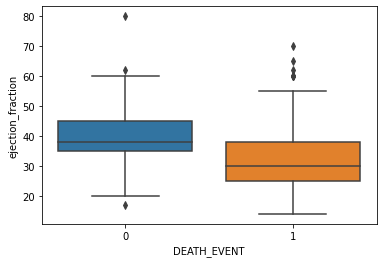

In [25]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

박스 플롯은 0일때의 분포와 1일때의 분포를 각각 볼때 사용

x는 범주형, y는 수치형 데이터를 쓴다.

이상치를 보기 편하다.

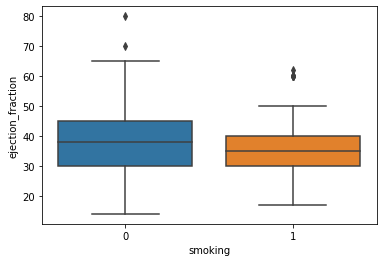

In [26]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

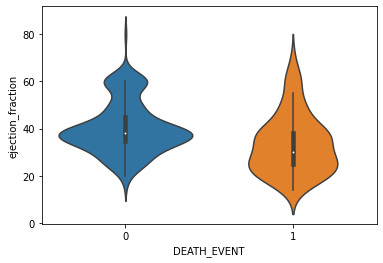

In [27]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)


박스 플롯이 보기 편해서 그런지 더 선호한다.

In [28]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
'''
'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object'
'''
#위에 복사 해 넣은걸 붙여 넣으면서 분류

X_num = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine',
            'serum_sodium','time']]
X_cat = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
y = df['DEATH_EVENT']

범주형과 범주형이 아닌것과, y값을 나누도록 한다.

In [31]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled)

In [32]:
X_scaled.columns = X_num.columns

In [33]:
X_num.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

In [34]:
X_scaled.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [35]:
X = pd.concat([X_scaled, X_cat], axis=1)

두 데이터프레임을 합친다.

In [36]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0


데이터를 분석한후

데이터를 범주형과 수치형으로 구분한 뒤,

수치형 데이터는 스케일링 진행.

이후 두 데이터를 합친다.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

사이킷런을 이용해서 데이터를 나누어준다.

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
'''
학습 부족 에러가 뜬다면,
max_iter를 늘려준다.(max_iter=100 이 디폴트 값이다.)
모델 을 만들때 인자로 넣어줌.
'''
#모델을 만들고 만들어진 모델을 가져와서 학습시킨다.
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

데이터 탐색, 전처리, 모델 생성등 과정들을 각각 따로 저장해두고 필요할때마다 사용하게 시트같은걸 만들어 두어라.

In [41]:
from sklearn.metrics import classification_report
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        56
           1       0.86      0.71      0.77        34

    accuracy                           0.84        90
   macro avg       0.85      0.82      0.83        90
weighted avg       0.85      0.84      0.84        90



In [42]:
from xgboost import XGBClassifier
#수많은 모델들중 이것만 사용해도 된다 싶을정도로 성능이 좋아
#캐글 상위권들이 모두 사용하는 모델.

#하지만 모든 모델들을 다 사용해서 테스트를 해봐야 한다.
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
model_xgb.feature_importances_

array([0.10841826, 0.05058692, 0.12645894, 0.06354859, 0.12771115,
       0.07166223, 0.2502375 , 0.03691119, 0.05090347, 0.03083336,
       0.03755039, 0.045178  ], dtype=float32)

이게 컬럼들 마다의 중요도를 보여준다.

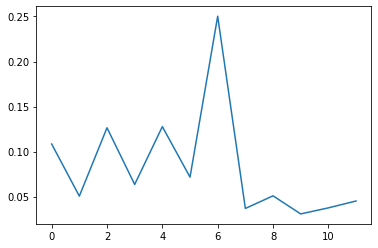

In [44]:
plt.plot(model_xgb.feature_importances_)

6번이 튀는걸 보면 6번이 뭔지 궁굼하다.

한번 보도록 하자.

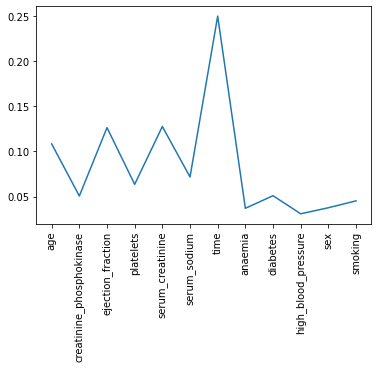

In [45]:
plt.plot(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

이 데이터에서 time은 빼야 한다.



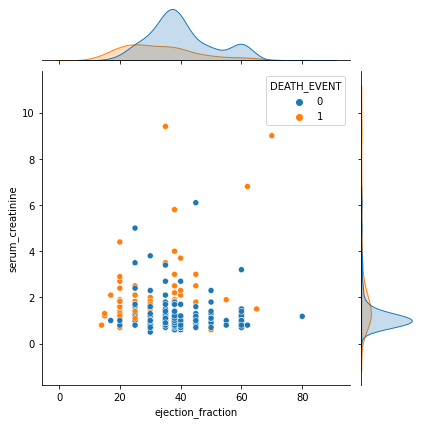

In [46]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')